# Data Storage

## Install libraries & packages

In [3]:
## Install libraries & install packages needed to run MongoDB
import requests
import time
import matplotlib.pyplot as plt
import os
from IPython.display import clear_output
import pandas as pd
import seaborn as sns
os.environ['PATH'] += os.pathsep + '/usr/local/bin' 

## Start Docker container

In [4]:
!docker-compose up -d

 Container my_spark  Creating
 Container my_mongo  Creating
 Container my_jupyter  Creating
 Container bdeng-zookeeper-1  Recreate
 Container 817fb5452389_bdeng-zookeeper-1  Stopping
 Container 817fb5452389_bdeng-zookeeper-1  Stopped
 Container 817fb5452389_bdeng-zookeeper-1  Removing
 Container 817fb5452389_bdeng-zookeeper-1  Error while Removing
Error response from daemon: Conflict. The container name "/my_spark" is already in use by container "84faa88860f773a88f0f1cb1decf86e28d33b4e636c6f5c98d6a33ef3c004b81". You have to remove (or rename) that container to be able to reuse that name.


### Check if the services are running

In [5]:
!docker ps

CONTAINER ID   IMAGE                              COMMAND                  CREATED          STATUS                PORTS                                              NAMES
fa6a686dd5f4   confluentinc/cp-kafka:latest       "/etc/confluent/dockâ€¦"   26 minutes ago   Up 26 minutes         9092/tcp, 0.0.0.0:29092->29092/tcp                 bdeng-kafka-1
817fb5452389   confluentinc/cp-zookeeper:latest   "/etc/confluent/dockâ€¦"   26 minutes ago   Up 26 minutes         2888/tcp, 3888/tcp, 0.0.0.0:22181->2181/tcp        bdeng-zookeeper-1
cab6dbd2207b   confluentinc/cp-kafka:latest       "/etc/confluent/dockâ€¦"   8 days ago       Up 8 days             0.0.0.0:9092->9092/tcp, 0.0.0.0:29093->29093/tcp   bdeng-main-kafka-1
487c3227b56c   jupyter/base-notebook:latest       "tini -g -- start-noâ€¦"   8 days ago       Up 8 days (healthy)   0.0.0.0:8888->8888/tcp                             my_jupyter
dc3e03349414   confluentinc/cp-zookeeper:latest   "/etc/confluent/dockâ€¦"   8 days ago       Up 8 

# Process CSV Data

### Install necessary packages

In [6]:
!pip install pymongo

### Read data and display the first few rows

In [46]:
import pandas as pd

# Read the CSV file with the specified encoding
poi_df = pd.read_csv('data/top-locations-wien.csv', encoding='latin1', sep=';')


# Display the first few rows of the dataframe
print(poi_df.head())

             title    category  \
0        21er Haus      museum   
1   A.E. Kï¿½chert    shopping   
2             Aida       cafes   
3  Akademietheater  musicstage   
4        Albertina      museum   

                                        Beschreibung                  address  \
0  Das Museum wurde 2011 saniert und stellt unter...        Arsenalstraï¿½e 1   
1  Dieser Traditions-Juwelier schmï¿½ckt heute mi...          Neuer Markt 15    
2  Aida ist eine Wiener Konditoreikette. Das Desi...  Stock-im-Eisen-Platz 2    
3  Seit 1922 ist das Akademietheater die zweite S...          Lisztstraï¿½e 1   
4  Die Albertina besitzt nicht nur eine der grï¿½...        Albertinaplatz 1    

    zip  city      geo_latitude     geo_longitude             tel_1  \
0  1030  Wien  48,1857710810320  16,3836224650817  +43 1 795 57-134   
1  1010  Wien        48,2065731        16,3705892               NaN   
2  1010  Wien        48,2080194        16,3720473  +43 1 512 79 25    
3  1030  Wien        48,

In [47]:
# Create new DataFrame for the Vizualisation (category and coordinates)

# Auswahl der gewünschten Spalten
new_df = poi_df[['category', 'geo_latitude', 'geo_longitude']]

# Ausgabe des neuen DataFrames
print(new_df)

        category      geo_latitude     geo_longitude
0         museum  48,1857710810320  16,3836224650817
1       shopping        48,2065731        16,3705892
2          cafes        48,2080194        16,3720473
3     musicstage        48,2002455        16,3770872
4         museum        48,2048541        16,3681588
..           ...               ...               ...
130   gastronomy         48,204367        16,3688208
131   gastronomy         48,210862         16,372725
132  sightseeing        48,1542998         16,441214
133       museum       48,20222973       16,35943794
134     shopping        48,2090112        16,3696138

[135 rows x 3 columns]


### Check for missing values

In [48]:
print(new_df.isnull().sum())

category         0
geo_latitude     0
geo_longitude    0
dtype: int64


### CSV-Data cleaning

In [49]:
# Fill or drop missing values
new_df = new_df.dropna()  # Dropping rows with missing values

# Check for duplicates
print(new_df.duplicated().sum())

# Remove duplicates
new_df = new_df.drop_duplicates()

5


### Show clean Dataframe

In [51]:
print(new_df)

        category      geo_latitude     geo_longitude
0         museum  48,1857710810320  16,3836224650817
1       shopping        48,2065731        16,3705892
2          cafes        48,2080194        16,3720473
3     musicstage        48,2002455        16,3770872
4         museum        48,2048541        16,3681588
..           ...               ...               ...
130   gastronomy         48,204367        16,3688208
131   gastronomy         48,210862         16,372725
132  sightseeing        48,1542998         16,441214
133       museum       48,20222973       16,35943794
134     shopping        48,2090112        16,3696138

[130 rows x 3 columns]


## Save data locally

In [61]:
# Speichern des DataFrames als CSV-Datei mit richtiger Spaltenstruktur
new_df.to_csv('data/poi_coordinates.csv', index=False, sep=';')

print("Datei wurde erfolgreich im 'data'-Ordner gespeichert.")

Datei wurde erfolgreich im 'data'-Ordner gespeichert.


## Analyse and Vizualisation of CSV-Data

In [23]:
!pip install pandas matplotlib seaborn folium geopandas shapely

   ---------------------------------------- 0.0/323.4 kB ? eta -:--:--
   ----- ---------------------------------- 41.0/323.4 kB 1.9 MB/s eta 0:00:01
   --------------- ------------------------ 122.9/323.4 kB 1.8 MB/s eta 0:00:01
   ------------------------------------- -- 307.2/323.4 kB 2.1 MB/s eta 0:00:01
   ---------------------------------------- 323.4/323.4 kB 2.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   -- ------------------------------------- 0.1/1.4 MB 2.9 MB/s eta 0:00:01
   ----- ---------------------------------- 0.2/1.4 MB 2.2 MB/s eta 0:00:01
   ------- -------------------------------- 0.3/1.4 MB 2.2 MB/s eta 0:00:01
   -------- ------------------------------- 0.3/1.4 MB 2.2 MB/s eta 0:00:01
   ---------- ----------------------------- 0.4/1.4 MB 2.1 MB/s eta 0:00:01
   ----------- ---------------------------- 0.4/1.4 MB 1.9 MB/s eta 0:00:01
   ----------- ---------------------------- 0.4/1.4 MB 1.6 MB/s eta 0:00:01
   ------

       geo_latitude  geo_longitude
count    128.000000     128.000000
mean      48.204204      16.364056
std        0.011234       0.022678
min       48.154300      16.246082
25%       48.200685      16.359017
50%       48.205160      16.368555
75%       48.209432      16.373316
max       48.240283      16.441214
category
shopping          29
museum            24
musicstage        18
sightseeing       15
cafes             14
nightlife         12
gastronomy        11
restaurants        4
accommodations     1
Name: count, dtype: int64


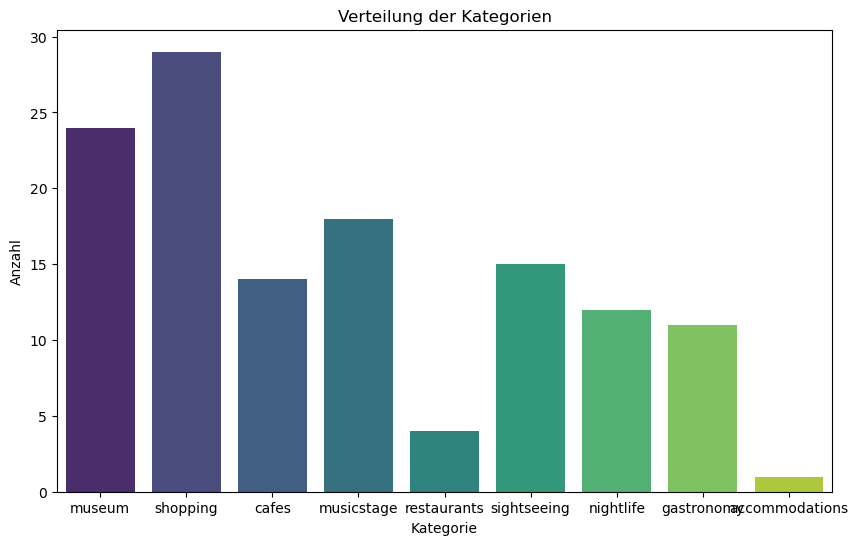

Die Karte wurde erfolgreich als 'poi_map_vienna.html' gespeichert.


In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import MarkerCluster
from shapely.geometry import Point

# Gegebene Daten für Kategorien und Koordinaten
data = pd.read_csv('data/poi_coordinates.csv', encoding='latin1', sep=';')

# DataFrame erstellen
new_df = pd.DataFrame(data)

# Filtern nach den gewünschten Kategorien
desired_categories = ['museum', 'shopping', 'cafes', 'musicstage', 
                      'restaurants', 'sightseeing', 'nightlife', 
                      'gastronomy', 'accommodations']
new_df['category'] = new_df['category'].str.lower()  # Konvertierung zu Kleinbuchstaben für die Kategorienvergleich
new_df = new_df[new_df['category'].isin(desired_categories)]

# Grundlegende Analyse
print(new_df.describe())
print(new_df['category'].value_counts())

# Visualisierung der Verteilung der Kategorien mit Matplotlib und Seaborn
plt.figure(figsize=(10, 6))
sns.countplot(data=new_df, x='category', palette='viridis')
plt.title('Verteilung der Kategorien')
plt.xlabel('Kategorie')
plt.ylabel('Anzahl')
plt.show()

# Erstellen einer Karte für Wien mit Folium
map_vienna = folium.Map(location=[48.210033, 16.363449], zoom_start=13)

# MarkerCluster für eine bessere Darstellung von dichten Markergruppen
marker_cluster = MarkerCluster().add_to(map_vienna)

# Funktion zur Zuordnung von Farben basierend auf der Kategorie
def get_color(category):
    if category == 'museum':
        return 'purple'
    elif category == 'shopping':
        return 'blue'
    elif category == 'cafes':
        return 'green'
    elif category == 'musicstage':
        return 'orange'
    elif category == 'restaurants':
        return 'red'
    elif category == 'sightseeing':
        return 'darkblue'
    elif category == 'nightlife':
        return 'darkred'
    elif category == 'gastronomy':
        return 'lightgreen'
    elif category == 'accommodations':
        return 'cadetblue'
    else:
        return 'gray'  # Fallback für unbekannte Kategorien

# Hinzufügen der POI-Marker zur Karte
for _, row in new_df.iterrows():
    folium.Marker(
        location=[row['geo_latitude'], row['geo_longitude']],
        popup=row['category'].capitalize(),
        icon=folium.Icon(color=get_color(row['category']))
    ).add_to(marker_cluster)

# Speichern der Karte als HTML-Datei
map_vienna.save('data/poi_map_vienna.html')

# Ausgabe, um den Benutzer darüber zu informieren, dass die Karte gespeichert wurde
print("Die Karte wurde erfolgreich als 'poi_map_vienna.html' gespeichert.")


# Set up Spark

In [ ]:
import os
from pyspark.sql import SparkSession

# Configure the Spark session to connect to the specified Spark master
spark = SparkSession.builder \
    .appName("KafkaSparkStream") \
    .master("spark://172.29.16.102:7077") \
    .config("spark.executor.memory", "2g") \
    .config("spark.executor.cores", "1") \
    .getOrCreate()

Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
24/06/26 15:33:24 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
24/06/26 15:33:25 WARN Utils: Service 'SparkUI' could not bind on port 4040. Attempting port 4041.
24/06/26 15:33:25 WARN Utils: Service 'SparkUI' could not bind on port 4041. Attempting port 4042.


## Transform and Analyze Data

In [ ]:
from pyspark.sql.functions import col, from_json, explode
from pyspark.sql.types import StructType, StructField, StringType, DoubleType, IntegerType, ArrayType, LongType

# Define schema for the data
place_schema = StructType([
    StructField("uid", LongType(), True),
    StructField("name", StringType(), True),
    StructField("bike", IntegerType(), True),
    StructField("bike_numbers", ArrayType(StringType()), True),
    StructField("free_racks", IntegerType(), True),
    StructField("bike_racks", IntegerType(), True),
    StructField("lat", DoubleType(), True),
    StructField("lng", DoubleType(), True)
])

city_schema = StructType([
    StructField("name", StringType(), True),
    StructField("places", ArrayType(place_schema), True)
])

country_schema = StructType([
    StructField("name", StringType(), True),
    StructField("cities", ArrayType(city_schema), True)
])

data_schema = StructType([
    StructField("countries", ArrayType(country_schema), True)
])

# Create stream dataframe setting Kafka server, topic, and offset option
df = (spark
      .readStream
      .format("kafka")
      .option("kafka.bootstrap.servers", "localhost:29093")  # Kafka server
      .option("subscribe", "nextbike_data")  # Topic
      .option("startingOffsets", "earliest")  # Start from beginning
      .load())

# Convert binary to string key and value
df1 = (df
       .withColumn("key", df["key"].cast(StringType()))
       .withColumn("value", df["value"].cast(StringType())))

# Parse JSON data
df2 = df1.select(from_json(col("value"), data_schema).alias("data"))

# Explode the nested structure to flatten the DataFrame
df_countries = df2.select(explode(col("data.countries")).alias("country"))
df_cities = df_countries.select(col("country.name").alias("country_name"), explode(col("country.cities")).alias("city"))
df_places = df_cities.select(
    col("country_name"),
    col("city.name").alias("city_name"),
    explode(col("city.places")).alias("place")
)

# Select and rename required fields
df_formatted = df_places.select(
    col("country_name").alias("country"),
    col("city_name").alias("city"),
    col("place.uid").alias("place_uid"),
    col("place.name").alias("place_name"),
    col("place.bike").alias("bike"),
    col("place.bike_numbers").alias("bike_numbers"),
    col("place.free_racks").alias("free_racks"),
    col("place.bike_racks").alias("total_racks"),
    col("place.lat").alias("latitude"),
    col("place.lng").alias("longitude")
)

# Show the schema of the dataframe
df_formatted.printSchema()

# API

## Visualize the Streaming Data

In [ ]:
# Function to query the API and store data
def query_api_and_store_data():
    url = "https://api.nextbike.net/maps/nextbike-live.json"

    try:
        response = requests.get(url)
        data = response.json()
        
        # Extract relevant data
        countries = data['countries']
        records = []
        for country in countries:
            for city in country['cities']:
                for place in city['places']:
                    records.append({
                        'country': country['name'],
                        'city': city['name'],
                        'place_uid': place['uid'],
                        'place_name': place['name'],
                        'bike': place['bike'],
                        'bike_numbers': place.get('bike_numbers', []),
                        'free_racks': place.get('free_racks', None),
                        'total_racks': place.get('bike_racks', None),
                        'latitude': place['lat'],
                        'longitude': place['lng'],
                    })
        
        # Create DataFrame
        df = pd.DataFrame(records)
        
        # Display the head of the DataFrame
        print(df.head())
        
    except Exception as e:
        print("Error:", e)
query_api_and_store_data()